<a href="https://colab.research.google.com/github/Kate5-7-2021/MFV/blob/main/Term_Project_COVID_19_Vaccines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
dataframe = pd.read_csv('/content/vaccinetweets-final.csv',sep=',',engine ='python', header=0)
dataframe

tweetid  ...                                             pfizer
0            0  ...  ⚠️ Moins de Moderna, plus de Pfizer... l'appro...
1            1  ...  @AlexBerenson @pfizer @bmj_latest Link To This...
2            2  ...  @escobar_riera Dr. Tuve covid en enero antes d...
3            3  ...  @cupidzclozet me - in fact, I am 20 days past ...
4            4  ...  @quartzpuerta @MrVanGriffin @AlanSarapa I real...
...        ...  ...                                                ...
89995     9995  ...  @EVERALDATLARGE Maybe if Scumo had told the tr...
89996     9996  ...  @TarrassSamira Als een arts (die 25 jaar het i...
89997     9997  ...  Les persones nascudes entre els anys 1942 i 19...
89998     9998  ...                        Pfizer-BioNTech dose two: ✅
89999     9999  ...  @GolabekTomek @JMiziolek @pobozy Jeśli AZ kosz...

[90000 rows x 3 columns]

In [ ]:
import requests
from textblob import Word
import nltk
nltk.download('wordnet')
nltk.download('punkt')
from textblob import TextBlob
from nltk.stem import PorterStemmer


def CleanData(dfcolumn):
  linksremoved = dfcolumn.replace(to_replace=r'^https?:\/\/.*[\r\n]*',value='',regex=True)
  punctuationremoved = linksremoved.str.replace('[^\w\s]','')
  spclcharsremoved = punctuationremoved.str.replace('[^A-Za-z0-9 ]+','')
  numsremoved = spclcharsremoved.str.replace('[^A-Za-z ]+','')
  data = requests.get("https://gist.githubusercontent.com/sebleier/554280/raw/7e0e4a1ce04c2bb7bd41089c9821dbcf6d0c786c/NLTK's%2520list%2520of%2520english%2520stopwords")
  a = data.text
  stop = a.split()
  stopwordsremoved = numsremoved.apply(lambda x: " ".join(x for x in x.split() if x not in stop))
  lowercased = stopwordsremoved.apply(lambda x: " ".join(x.lower() for x in x.split()))
  tokenized = lowercased.apply(lambda x: TextBlob(x).words)
  st = PorterStemmer()
  stemmed = tokenized.apply(lambda x: " ".join([st.stem(word) for word in x]))
  #Lemmatization
  lemmatized = stemmed.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
  return lemmatized

modn = CleanData(dataframe['moderna'])
pfizr = CleanData(dataframe['pfizer'])
dataframe['moderna_cleaned'] = modn
dataframe['pfizer_cleaned'] = pfizr

dataframe

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  


tweetid  ...                                     pfizer_cleaned
0            0  ...  moin de moderna plu de pfizer lapprovisionn en...
1            1  ...  alexberenson pfizer bmjlatest link to thi bmj ...
2            2  ...  escobarriera dr tuve covid en enero ant de aye...
3            3  ...        cupidzclozet fact i day past nd shot pfizer
4            4  ...  quartzpuerta mrvangriffin alansarapa i realli ...
...        ...  ...                                                ...
89995     9995  ...  everaldatlarg mayb scumo told truth order vacc...
89996     9996  ...  tarrasssamira al een art die jaar het immuunsy...
89997     9997  ...  le person nascud entr el ani ja poden demanar ...
89998     9998  ...                            pfizerbiontech dose two
89999     9999  ...  golabektomek jmiziolek pobozi jeli az kosztuj ...

[90000 rows x 5 columns]

In [ ]:
import re, numpy as np, pandas as pd
from pprint import pprint
import sys
!{sys.executable} -m spacy download en
import matplotlib.pyplot as plt

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


(-0.5, 499.5, 299.5, -0.5)

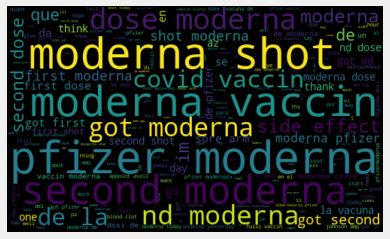

In [ ]:
#plot the word cloud for moderna

allWords=''.join([twts for twts in dataframe['moderna_cleaned']])
wordCloud = WordCloud(width = 500, height=300, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')

(-0.5, 499.5, 299.5, -0.5)

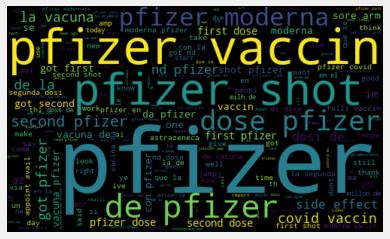

In [ ]:
#plot the word cloud for pfizer

allWords=''.join([twts for twts in dataframe['pfizer_cleaned']])
wordCloud = WordCloud(width = 500, height=300, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')

In [ ]:
#Gensium
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel

In [ ]:
import os

import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx
from textblob import TextBlob
from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore")
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
plt.style.use('fivethirtyeight')

In [ ]:
# Create function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Create function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#create two columns for moderna and two columns for pfizer

dataframe['moderna_subjectivity']=dataframe['moderna_cleaned'].apply(getSubjectivity)
dataframe['moderna_polarity']=dataframe['moderna_cleaned'].apply(getPolarity)
dataframe['pfizer_subjectivity']=dataframe['pfizer_cleaned'].apply(getSubjectivity)
dataframe['pfizer_polarity']=dataframe['pfizer_cleaned'].apply(getPolarity)


In [ ]:
#compute the negative, neutral, and positive analysis 
def getAnalysis(score):
  if score <0:
    return 'Nagative'
  elif score ==0:
    return 'Neutral'
  else:
    return 'Positive'
dataframe['moderna_sentiment']=dataframe['moderna_polarity'].apply(getAnalysis)
dataframe['pfizer_sentiment']=dataframe['pfizer_polarity'].apply(getAnalysis)
dataframe

tweetid  ... pfizer_sentiment
0            0  ...          Neutral
1            1  ...          Neutral
2            2  ...          Neutral
3            3  ...         Nagative
4            4  ...          Neutral
...        ...  ...              ...
89995     9995  ...          Neutral
89996     9996  ...          Neutral
89997     9997  ...          Neutral
89998     9998  ...          Neutral
89999     9999  ...         Positive

[90000 rows x 11 columns]

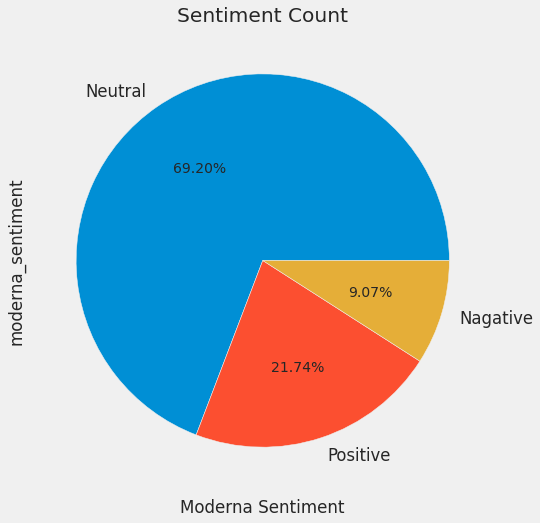

In [ ]:
#plot to show the Moderna sentiment count
dataframe['moderna_sentiment'].value_counts()
plt.figure(figsize=(8,8))
plt.title('Sentiment Count')
plt.xlabel('Moderna Sentiment')
plt.ylabel('Count')
dataframe['moderna_sentiment'].value_counts().plot(kind='pie', subplots=True, autopct='%1.2f%%')
plt.show()


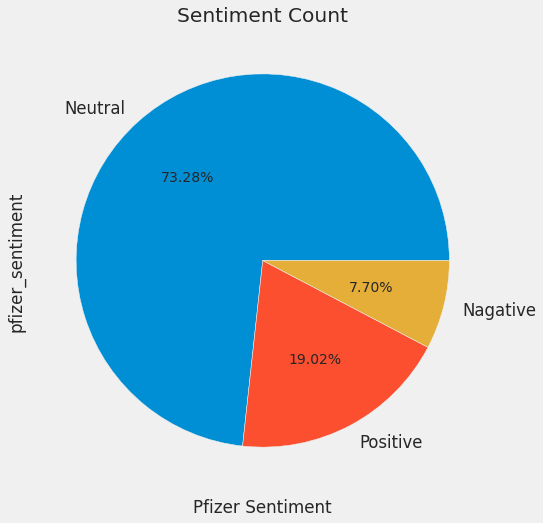

In [ ]:
#plot to show the pfizer sentiment count
dataframe['pfizer_sentiment'].value_counts()
plt.figure(figsize=(8,8))
plt.title('Sentiment Count')
plt.xlabel('Pfizer Sentiment')
plt.ylabel('Count')
dataframe['pfizer_sentiment'].value_counts().plot(kind='pie', subplots=True, autopct='%1.2f%%')
plt.show()


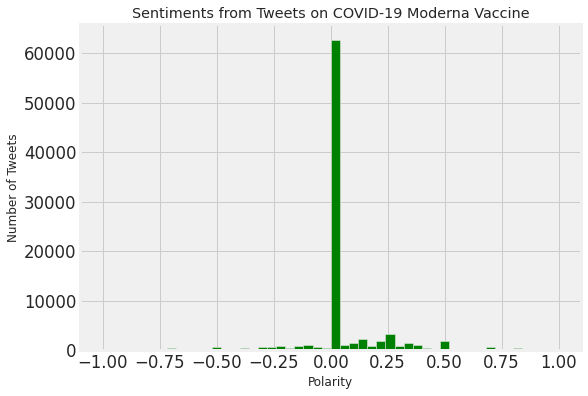

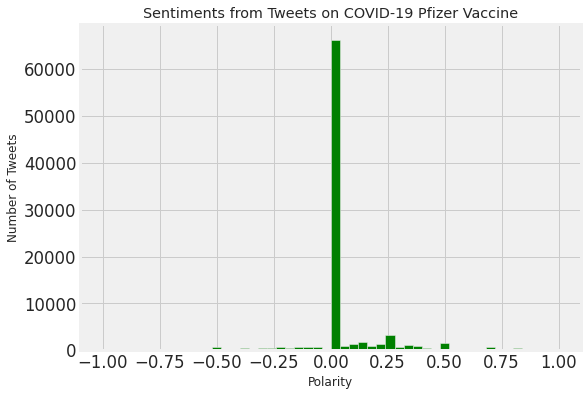

In [ ]:
#histogram plotting
%matplotlib inline
import matplotlib.pyplot as plt
def Histogram_V(dframe, vacc_name):
  fig, ax = plt.subplots(figsize=(8, 6))
  dataframe.columns
  dframe.hist(bins=50, figsize=(20,15), ax=ax, color="green")
  plt.title("Sentiments from Tweets on COVID-19 "+vacc_name+" Vaccine")
  plt.xlabel("Polarity")
  plt.ylabel("Number of Tweets")
  plt.savefig("attribute_histogram_plotstrain"+vacc_name)
  plt.show()
Histogram_V(dataframe[['moderna_sentiment', 'moderna_cleaned', 'moderna_polarity' ]], "Moderna")
Histogram_V(dataframe[['pfizer_sentiment', 'pfizer_cleaned', 'pfizer_polarity' ]], "Pfizer")


In [ ]:
#plot the polarity and subjectivity for Moderna                         #code to draw the scatter plot for Moderna
plt.figure(figsize=(8,6))
for i in range(0, dataframe.shape[0]):
  plt.scatter(dataframe['moderna_polarity'][i],dataframe['moderna_subjectivity'][i], color='green')

plt.title('Moderna Sentiment Analysis')
plt.xlabel('Moderna Polarity')
plt.ylabel('Moderna Subjectivity')
plt.show()

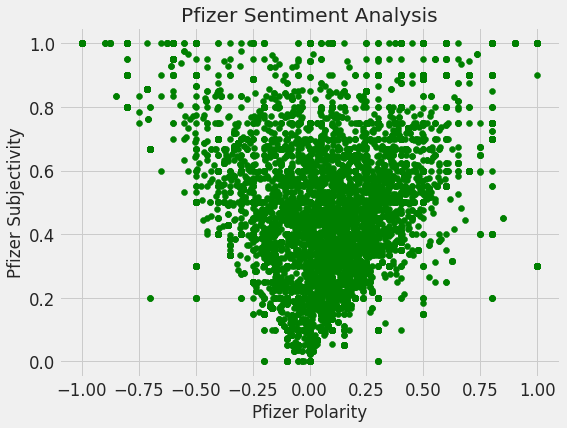

In [ ]:
#plot the polarity and subjectivity for Pfizer                     #code to draw the scatter plot for Pfizer
plt.figure(figsize=(8,6))                                     # This scatter plot is for dataset with 60000 data 
for i in range(0, dataframe.shape[0]):
  plt.scatter(dataframe['pfizer_polarity'][i],dataframe['pfizer_subjectivity'][i], color='green')

plt.title('Pfizer Sentiment Analysis')
plt.xlabel('Pfizer Polarity')
plt.ylabel('Pfizer Subjectivity')
plt.show()

In [ ]:
#Parts of Speech (POS) Tagging
!pip install Corenlp
nltk.download('universal_tagset') 
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize

  Created wheel for Corenlp: filename=corenlp-0.0.14-cp37-none-any.whl size=5255 sha256=470352c7bed754f3aed7e5b419a23ba020f53cd061419e112f0bbec3ecedc53e
  Stored in directory: /root/.cache/pip/wheels/7a/9a/14/50bb2b7330c0a8772fab2c2f6c6c5e72558a2916e6165bad87
Successfully built Corenlp
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
texts =dataframe['moderna_cleaned'].tolist()
map(word_tokenize, texts)

In [ ]:
texts =dataframe['pfizer_cleaned'].tolist()
map(word_tokenize, texts)

In [ ]:
dataframe['moderna_cleaned'].apply(word_tokenize) 

0        [moin, de, moderna, plu, de, pfizer, lapprovis...
1        [quartzpuerta, mrvangriffin, alansarapa, i, re...
2        [marcetravisani, quedan, pfizer, moderna, sput...
3        [grayadalind, a, seem, interest, testimoni, go...
4        [lazaroperez, lzaro, cario, mobuena, tardeni, ...
                               ...                        
89995    [hah, meme, buldum, neden, modernaya, ok, koul...
89996    [za, samo, meseca, u, doba, koron, izgradjena,...
89997    [z, fajniejszych, rzeczi, udalo, mi, sie, zasz...
89998    [evo, sada, znate, da, moja, domovina, titi, b...
89999    [millon, de, pblico, han, servido, empresa, as...
Name: moderna_cleaned, Length: 90000, dtype: object

In [ ]:
dataframe['pfizer_cleaned'].apply(word_tokenize) 

0        [moin, de, moderna, plu, de, pfizer, lapprovis...
1        [alexberenson, pfizer, bmjlatest, link, to, th...
2        [escobarriera, dr, tuve, covid, en, enero, ant...
3        [cupidzclozet, fact, i, day, past, nd, shot, p...
4        [quartzpuerta, mrvangriffin, alansarapa, i, re...
                               ...                        
89995    [everaldatlarg, mayb, scumo, told, truth, orde...
89996    [tarrasssamira, al, een, art, die, jaar, het, ...
89997    [le, person, nascud, entr, el, ani, ja, poden,...
89998                          [pfizerbiontech, dose, two]
89999    [golabektomek, jmiziolek, pobozi, jeli, az, ko...
Name: pfizer_cleaned, Length: 90000, dtype: object

In [ ]:
dataframe['moderna_cleaned'].apply(word_tokenize).tolist()


[['moin',
  'de',
  'moderna',
  'plu',
  'de',
  'pfizer',
  'lapprovisionn',
  'en',
  'vaccin',
  'chang',
  'le',
  'plan',
  'de',
  'match',
  'doitil',
  'changer',
  'au',
  'httpstcobgysqvtv'],
 ['quartzpuerta',
  'mrvangriffin',
  'alansarapa',
  'i',
  'realli',
  'want',
  'get',
  'pfizer',
  'avail',
  'open',
  'counti',
  'httpstcoocrfqvmqu'],
 ['marcetravisani',
  'quedan',
  'pfizer',
  'moderna',
  'sputnik',
  'y',
  'sinovac',
  'por',
  'ahora',
  'y',
  'la',
  'de',
  'india',
  'viru',
  'muerto'],
 ['grayadalind',
  'a',
  'seem',
  'interest',
  'testimoni',
  'got',
  'moderna',
  'vaccin',
  'today',
  'no',
  'real',
  'immedi',
  're',
  'httpstcoggxcubw'],
 ['lazaroperez',
  'lzaro',
  'cario',
  'mobuena',
  'tardeni',
  'duda',
  'cabe',
  'y',
  'ser',
  'el',
  'mejor',
  'en',
  'la',
  'historia',
  'moderna',
  'de',
  'mx',
  'httpstcojadmkjbfu'],
 ['realkimstov', 'just', 'got', 'moderna', 'set'],
 ['moderna', 'vaccin', 'done', 'vaccin', 'sograt'

In [ ]:
dataframe['pfizer_cleaned'].apply(word_tokenize).tolist()

[['moin',
  'de',
  'moderna',
  'plu',
  'de',
  'pfizer',
  'lapprovisionn',
  'en',
  'vaccin',
  'chang',
  'le',
  'plan',
  'de',
  'match',
  'doitil',
  'changer',
  'au',
  'httpstcobgysqvtv'],
 ['alexberenson',
  'pfizer',
  'bmjlatest',
  'link',
  'to',
  'thi',
  'bmj',
  'articl',
  'pl'],
 ['escobarriera',
  'dr',
  'tuve',
  'covid',
  'en',
  'enero',
  'ant',
  'de',
  'ayer',
  'pfizer',
  'llevo',
  'dia',
  'con',
  'fiebr',
  'dolor',
  'de',
  'cabeza',
  'de',
  'morir',
  'httpstcoztwikdgrth'],
 ['cupidzclozet', 'fact', 'i', 'day', 'past', 'nd', 'shot', 'pfizer'],
 ['quartzpuerta',
  'mrvangriffin',
  'alansarapa',
  'i',
  'realli',
  'want',
  'get',
  'pfizer',
  'avail',
  'open',
  'counti',
  'httpstcoocrfqvmqu'],
 ['bugmanluk',
  'themrmo',
  'haha',
  'one',
  'realli',
  'funni',
  'i',
  'skeptic',
  'first',
  'ever',
  'sinc',
  'i',
  'got',
  'pfizer',
  'httpstcoqiujsinwgi'],
 ['i', 'dont', 'know', 'allergi', 'pfizer', 'vaccin', 'tast', 'horribl'

In [ ]:
from nltk import pos_tag_sents
import nltk
nltk.download('averaged_perceptron_tagger')
def POStagging(cleanedcolumn):
  WtoPOS=pos_tag_sents(dataframe['moderna_cleaned'].apply(word_tokenize).tolist())
  dataframe['moderna_POS_Tag'] = WtoPOS
  app = pd.Series(WtoPOS)
  app.map(lambda x:1 if x[1:]=='N' else 0).sum()
  print(app)  
  i=j=k=l=m=n=p=q=s=t=0
  for x in WtoPOS:
    for y in x:
      for o in y:
        if o == 'NN':
          i=i+1
        elif o == 'VBP':
          j=j+1
        elif o == 'RB':
          k=k+1
        elif o == 'JJ':
          l=l+1
        elif o == 'MD':
          m=m+1
        elif o == 'CC':
          n=n+1
        elif o == 'IN':
          p=p+1
        elif o == 'DT':
          q=q+1
        elif o == 'NNP':
          s=s+1
        elif o == 'JJR':
          t=t+1
        else: 0

  print('NOUN:',i)
  print('VERB:',j)
  print('ADVERB:',k)
  print('ADJECTIVE:',l)
  print('MODAL AUXILIARY:',m)
  print('COORDINATING CONJUNCTION:',n)
  print('SUBORDINATING CONJUNCTION:',p)
  print('DETERMINER:',q)
  print('PROPER NOUN:',s)
  print('COMPARATIVE ADJECTIVE:',t)

print("MODERNA POS:")
POStagging('moderna_cleaned')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
MODERNA POS:
0        [(moin, NN), (de, FW), (moderna, FW), (plu, FW...
1        [(quartzpuerta, NN), (mrvangriffin, NN), (alan...
2        [(marcetravisani, NN), (quedan, NN), (pfizer, ...
3        [(grayadalind, VB), (a, DT), (seem, JJ), (inte...
4        [(lazaroperez, NN), (lzaro, NN), (cario, NN), ...
                               ...                        
89995    [(hah, NN), (meme, NN), (buldum, NN), (neden, ...
89996    [(za, NN), (samo, NN), (meseca, NN), (u, JJ), ...
89997    [(z, NN), (fajniejszych, NN), (rzeczi, NN), (u...
89998    [(evo, RB), (sada, JJ), (znate, NN), (da, NN),...
89999    [(millon, NN), (de, IN), (pblico, FW), (han, N...
Length: 90000, dtype: object
NOUN: 620147
VERB: 42831
ADVERB: 27407
ADJECTIVE: 144528
MODAL AUXILIARY: 5003
COORDINATING CONJUNCTION: 3360
SUBORDINATI

In [ ]:
print("PFizer POS:")
POStagging('pfizer_cleaned')

PFizer POS:
0        [(moin, NN), (de, FW), (moderna, FW), (plu, FW...
1        [(quartzpuerta, NN), (mrvangriffin, NN), (alan...
2        [(marcetravisani, NN), (quedan, NN), (pfizer, ...
3        [(grayadalind, VB), (a, DT), (seem, JJ), (inte...
4        [(lazaroperez, NN), (lzaro, NN), (cario, NN), ...
                               ...                        
89995    [(hah, NN), (meme, NN), (buldum, NN), (neden, ...
89996    [(za, NN), (samo, NN), (meseca, NN), (u, JJ), ...
89997    [(z, NN), (fajniejszych, NN), (rzeczi, NN), (u...
89998    [(evo, RB), (sada, JJ), (znate, NN), (da, NN),...
89999    [(millon, NN), (de, IN), (pblico, FW), (han, N...
Length: 90000, dtype: object
NOUN: 620147
VERB: 42831
ADVERB: 27407
ADJECTIVE: 144528
MODAL AUXILIARY: 5003
COORDINATING CONJUNCTION: 3360
SUBORDINATING CONJUNCTION: 31077
DETERMINER: 10243
PROPER NOUN: 998
COMPARATIVE ADJECTIVE: 1874


In [ ]:
import nltk
nltk.download('brown')
nltk.download('punkt')
with open("vaccinetweets-final.csv", "r", encoding='latin-1') as file:
 vaccinetweets = file.read()

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


##**More Sentiment Analysis for Moderna**

In [ ]:
#packages
import operator
import numpy as np
import csv
import sklearn
from sklearn import svm
from sklearn.svm import SVC
from sklearn import naive_bayes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from collections import Counter
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

In [ ]:
#TF-IDF vectorization
tfidf_vect= TfidfVectorizer(analyzer='word')   
tfidf_vect.fit(dataframe['moderna_cleaned'])
xtfidf=tfidf_vect.transform(dataframe['moderna_cleaned'])

#split the dataset into training and validation datasets 
#x_train_m, x_test_m, y_train_m, y_test_m=train_test_split(xtfidf, dataframe['moderna_sentiment'], test_size=0.2, random_state=0)

In [ ]:
y=dataframe['moderna_sentiment']
x_train_m, x_test_m, y_train_m, y_test_m=train_test_split(xtfidf,y.values, test_size=0.2, random_state=0)

In [ ]:
x_train_m.shape, y_train_m.shape

((72000, 164807), (72000,))

In [ ]:
x_test_m.shape, y_test_m.shape

((18000, 164807), (18000,))

##**MultinomialNB**

In [ ]:
#MultinomialNB

nb_model_m = MultinomialNB()
nb_model_m.fit(x_train_m, y_train_m)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
print('Moderna NaiveBayes Score: %.3f' % nb_model_m.score(x_test_m,y_test_m))

Moderna NaiveBayes Score: 0.785


In [ ]:
predictions_m = nb_model_m.predict(x_test_m)
predictions_m

array(['Neutral', 'Neutral', 'Neutral', ..., 'Neutral', 'Neutral',
       'Neutral'], dtype='<U8')

In [ ]:
print('Moderna Predicted:', [y for y in predictions_m])
print('Moderna Sentiment:', [y for y in y_test_m])

Moderna Predicted: ['Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Neut

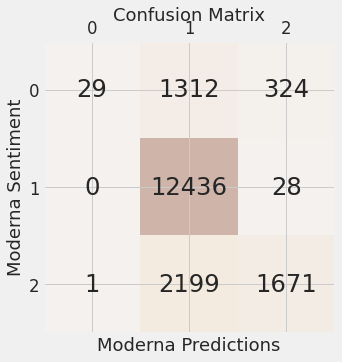

In [ ]:
predictions_m = nb_model_m.predict(x_test_m)
conf_matrix = confusion_matrix(y_true=y_test_m, y_pred=predictions_m)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Moderna Predictions', fontsize=18)
plt.ylabel('Moderna Sentiment', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
#from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
accuracy_m = accuracy_score(y_test_m, predictions_m) * 100
recall_m = recall_score (y_test_m, predictions_m, average='macro') *100
precision_m = precision_score(y_test_m, predictions_m, average='macro') *100
f1_score_m = f1_score(y_test_m, predictions_m, average='macro') *100
print('Moderna NB Accuracy:', accuracy_m)
print('Moderna NB recall:', recall_m)
print('Moderna NB Precision:', precision_m)
print('Moderna NB F1-score:', f1_score_m)

Moderna NB Accuracy: 78.53333333333333
Moderna NB recall: 48.22807834408695
Moderna NB Precision: 85.75002842546736
Moderna NB F1-score: 49.2223721849946


In [ ]:
nb_cross_valid_scores_m=cross_val_score(nb_model_m,xtfidf,y.values,cv=10)
nb_cross_valid_scores_m

array([0.798     , 0.80422222, 0.79733333, 0.78933333, 0.79533333,
       0.799     , 0.79711111, 0.80955556, 0.807     , 0.78966667])

In [ ]:
print("%0.2f%% accuracy with a standard deviation of %0.2f" % (nb_cross_valid_scores_m.mean()*100, nb_cross_valid_scores_m.std()))

79.01% accuracy with a standard deviation of 0.01


##**Logistic Regression**

In [ ]:
#Logistic Regression Model 
logist_model_m = LogisticRegression()
logist_model_m.fit(x_train_m, y_train_m)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print('Moderna Logist Score: %.3f' % logist_model_m.score(x_test_m,y_test_m))

Moderna Logist Score: 0.949


In [ ]:
predictions_m_l = logist_model_m.predict(x_test_m)
predictions_m_l

array(['Positive', 'Neutral', 'Neutral', ..., 'Neutral', 'Neutral',
       'Nagative'], dtype=object)

In [ ]:
print('Moderna Predicted:', [y for y in predictions_m_l])
print('Moderna Sentiment:', [y for y in y_test_m])

Moderna Predicted: ['Positive', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Nagative', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Positive', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Nagative', 'Neutral', 'Neutral', 'Nagative', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Nagative', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Positive', 'Positive', 'Positive', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Nagative', 'Neutral', 'Neutral', 'Neutral', 'Nagative', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Nagative', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Neutral', 

In [ ]:
#from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
accuracy_m = accuracy_score(y_test_m, predictions_m_l) * 100
recall_m = recall_score (y_test_m, predictions_m_l, average='macro') *100
precision_m = precision_score(y_test_m, predictions_m_l, average='macro') *100
f1_score_m = f1_score(y_test_m, predictions_m_l, average='macro') *100
print('Moderna Logist Accuracy:', accuracy_m)
print('Moderna Logist recall:', recall_m)
print('Moderna Logist Precision:', precision_m)
print('Moderna Logist F1-score:', f1_score_m)

Moderna Logist Accuracy: 94.85
Moderna Logist recall: 87.29574161883225
Moderna Logist Precision: 95.7070977929834
Moderna Logist F1-score: 90.93062918557129


In [ ]:
logist_cross_valid_scores_m=cross_val_score(logist_model_m,xtfidf,y.values,cv=10)
logist_cross_valid_scores_m

array([0.95455556, 0.95777778, 0.95366667, 0.949     , 0.94566667,
       0.94855556, 0.95633333, 0.95844444, 0.95655556, 0.95444444])

In [ ]:
print("%0.2f%% accuracy with a standard deviation of %0.2f" % (logist_cross_valid_scores_m.mean()*100, logist_cross_valid_scores_m.std()))

95.35% accuracy with a standard deviation of 0.00


##**KNN**

In [ ]:
#KNN Model
knn_model_m = KNeighborsClassifier(n_neighbors=27)
knn_model_m.fit(x_train_m, y_train_m)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=27, p=2,
                     weights='uniform')

In [ ]:
print('KNN Score: %.3f' % knn_model_m.score(x_test_m,y_test_m))

KNN Score: 0.701


In [ ]:
predictions_m_knn = knn_model_m.predict(x_test_m)
predictions_m_knn

array(['Neutral', 'Neutral', 'Neutral', ..., 'Neutral', 'Neutral',
       'Neutral'], dtype=object)

In [ ]:
print('Moderna Predicted:', [y for y in predictions_m_knn])
print('Moderna Sentiment:', [y for y in y_test_m])

Moderna Predicted: ['Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Nagative', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 

In [ ]:
#from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
accuracy_m = accuracy_score(y_test_m, predictions_m_knn) * 100
recall_m = recall_score (y_test_m, predictions_m_knn, average='macro') *100
precision_m = precision_score(y_test_m, predictions_m_knn, average='macro') *100
f1_score_m = f1_score(y_test_m, predictions_m_knn, average='macro') *100
print('Moderna KNN Accuracy:', accuracy_m)
print('Moderna KNN recall:', recall_m)
print('Moderna KNN Precision:', precision_m)
print('Moderna KNN F1-score:', f1_score_m)

Moderna KNN Accuracy: 70.08333333333333
Moderna KNN recall: 35.35876708845311
Moderna KNN Precision: 87.51899601395117
Moderna KNN F1-score: 31.350003201933536


In [ ]:
knn_cross_valid_scores_m=cross_val_score(knn_model_m,xtfidf,y.values,cv=10)
knn_cross_valid_scores_m

array([0.69644444, 0.70277778, 0.69711111, 0.70088889, 0.69833333,
       0.70144444, 0.69844444, 0.69788889, 0.69844444, 0.70388889])

In [ ]:
print("%0.2f%% accuracy with a standard deviation of %0.2f" % (knn_cross_valid_scores_m.mean()*100, knn_cross_valid_scores_m.std()))

69.96% accuracy with a standard deviation of 0.00


##**Decision Tree**

In [ ]:
dt_model_m = DecisionTreeClassifier(random_state=0)
dt_model_m = dt_model_m.fit(x_train_m,y_train_m)

In [ ]:
print('Decision Tree Score: %.3f' % dt_model_m.score(x_test_m,y_test_m))

Decision Tree Score: 0.986


In [ ]:
predictions_m_dt = dt_model_m.predict(x_test_m)
predictions_m_dt

array(['Positive', 'Neutral', 'Neutral', ..., 'Neutral', 'Neutral',
       'Nagative'], dtype=object)

In [ ]:
print('Moderna Predicted:', [y for y in predictions_m_dt])
print('Moderna Sentiment:', [y for y in y_test_m])

Moderna Predicted: ['Positive', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Nagative', 'Nagative', 'Positive', 'Neutral', 'Neutral', 'Positive', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Positive', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Nagative', 'Neutral', 'Neutral', 'Nagative', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Nagative', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Positive', 'Positive', 'Positive', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Nagative', 'Neutral', 'Neutral', 'Neutral', 'Nagative', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Nagative', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Positive', 'Neutral', 'Neutral

In [ ]:
#from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
accuracy_m = accuracy_score(y_test_m, predictions_m_dt) * 100
recall_m = recall_score (y_test_m, predictions_m_dt, average='macro') *100
precision_m = precision_score(y_test_m, predictions_m_dt, average='macro') *100
f1_score_m = f1_score(y_test_m, predictions_m_dt, average='macro') *100
print('Moderna DT Accuracy:', accuracy_m)
print('Moderna DT recall:', recall_m)
print('Moderna DT Precision:', precision_m)
print('Moderna DT F1-score:', f1_score_m)

Moderna DT Accuracy: 98.63333333333333
Moderna DT recall: 96.67150366176509
Moderna DT Precision: 96.8368662454913
Moderna DT F1-score: 96.75383691477286


In [ ]:
dt_cross_valid_scores_m=cross_val_score(dt_model_m,xtfidf,y.values,cv=10)
dt_cross_valid_scores_m

array([0.98588889, 0.98455556, 0.98611111, 0.98488889, 0.98466667,
       0.98488889, 0.98355556, 0.98588889, 0.98455556, 0.98711111])

In [ ]:
print("%0.2f%% accuracy with a standard deviation of %0.2f" % (dt_cross_valid_scores_m.mean()*100, dt_cross_valid_scores_m.std()))

98.52% accuracy with a standard deviation of 0.00


##**More Sentiment Analysis for Pfizer**

In [ ]:
tfidf_vect= TfidfVectorizer(analyzer='word')   
tfidf_vect.fit(dataframe['pfizer_cleaned'])
xtfidf=tfidf_vect.transform(dataframe['pfizer_cleaned'])

In [ ]:
y=dataframe['pfizer_sentiment']
x_train_p, x_test_p, y_train_p, y_test_p=train_test_split(xtfidf,y.values, test_size=0.2, random_state=0)

In [ ]:
x_train_p.shape, y_train_p.shape

((72000, 163808), (72000,))

In [ ]:
x_test_m.shape, y_test_m.shape

((18000, 164807), (18000,))

##**MultinomialNB**

In [ ]:
#MultinomialNB

nb_model_p = MultinomialNB()
nb_model_p.fit(x_train_p, y_train_p)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
print('Pfizer NaiveBayes Score: %.3f' % nb_model_p.score(x_test_p,y_test_p))

Pfizer NaiveBayes Score: 0.819


In [ ]:
predictions_p = nb_model_p.predict(x_test_p)
predictions_p

array(['Positive', 'Neutral', 'Neutral', ..., 'Neutral', 'Neutral',
       'Neutral'], dtype='<U8')

In [ ]:
print('Pfizer Predicted:', [y for y in predictions_p])
print('Pfizer Sentiment:', [y for y in y_test_p])

Pfizer Predicted: ['Positive', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Ne

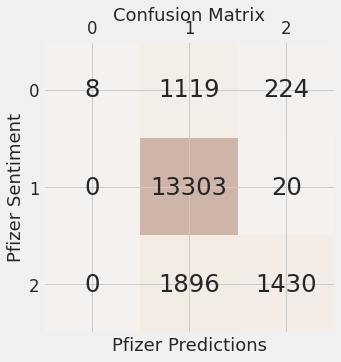

In [ ]:
predictions_p = nb_model_p.predict(x_test_p)
conf_matrix = confusion_matrix(y_true=y_test_p, y_pred=predictions_p)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Pfizer Predictions', fontsize=18)
plt.ylabel('Pfizer Sentiment', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
#from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
accuracy_p = accuracy_score(y_test_p, predictions_p) * 100
recall_p = recall_score (y_test_p, predictions_p, average='macro') *100
precision_p = precision_score(y_test_p, predictions_p, average='macro') *100
f1_score_p = f1_score(y_test_p, predictions_p, average='macro') *100
print('Pfizer NB Accuracy:', accuracy_p)
print('Pfizer NB recall:', recall_p)
print('Pfizer NB Precision:', precision_p)
print('Pfizer NB F1-score:', f1_score_p)

Pfizer NB Accuracy: 81.89444444444445
Pfizer NB recall: 47.812208571224126
Pfizer NB Precision: 88.98253494161173
Pfizer NB F1-score: 49.379380189342406


In [ ]:
nb_cross_valid_scores_p=cross_val_score(nb_model_p,xtfidf,y.values,cv=10)
nb_cross_valid_scores_p

array([0.82144444, 0.82444444, 0.81966667, 0.81877778, 0.817     ,
       0.824     , 0.823     , 0.82855556, 0.82288889, 0.82044444])

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (nb_cross_valid_scores_p.mean(), nb_cross_valid_scores_p.std()))

0.82 accuracy with a standard deviation of 0.00


##**Logistic Regression**

In [ ]:
#Logistic Regression Model 
logist_model_p = LogisticRegression()
logist_model_p.fit(x_train_p, y_train_p)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print('Pfizer Logist Score: %.3f' % logist_model_p.score(x_test_p,y_test_p))

Pfizer Logist Score: 0.952


In [ ]:
predictions_p_l = logist_model_p.predict(x_test_p)
predictions_p_l

array(['Positive', 'Neutral', 'Neutral', ..., 'Neutral', 'Nagative',
       'Neutral'], dtype=object)

In [ ]:
print('Pfizer Predicted:', [y for y in predictions_p_l])
print('Pfizer Sentiment:', [y for y in y_test_p])

Pfizer Predicted: ['Positive', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Nagative', 'Neutral', 'Nagative', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Nagative', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Positive', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Nagative', 'Neutral', 'Neutral', 'Neutral', 'Nagative', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Nagative', 'Positive', 'Positive', 'Neutral', 'Neutral', 'Nagative', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Nagative', 'Neutral', 'Neutral', 'Nagative', 'Neutral', 'Positive', 'Neutral', 'Positive', 'Neutral', 

In [ ]:
#from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
accuracy_p = accuracy_score(y_test_p, predictions_p_l) * 100
recall_p = recall_score (y_test_p, predictions_p_l, average='macro') *100
precision_p = precision_score(y_test_p, predictions_p_l, average='macro') *100
f1_score_p = f1_score(y_test_p, predictions_p_l, average='macro') *100
print('Pfizer Logist Accuracy:', accuracy_p)
print('Pfizer Logist recall:', recall_p)
print('Pfizer Logist Precision:', precision_p)
print('Pfizer Logist F1-score:', f1_score_p)

Pfizer Logist Accuracy: 95.24444444444444
Pfizer Logist recall: 85.28740299972367
Pfizer Logist Precision: 95.62484254096059
Pfizer Logist F1-score: 89.59601262834292


In [ ]:
logist_cross_valid_scores_p=cross_val_score(logist_model_p,xtfidf,y.values,cv=10)
logist_cross_valid_scores_p

array([0.95488889, 0.95044444, 0.94844444, 0.94911111, 0.95177778,
       0.95822222, 0.95588889, 0.95977778, 0.95733333, 0.95111111])

In [ ]:
print("%0.2f%% accuracy with a standard deviation of %0.2f" % (logist_cross_valid_scores_p.mean()*100, logist_cross_valid_scores_p.std()))

95.37% accuracy with a standard deviation of 0.00


##**KNN**

In [ ]:
#KNN Model
knn_model_p = KNeighborsClassifier(n_neighbors=27)
knn_model_p.fit(x_train_p, y_train_p)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=27, p=2,
                     weights='uniform')

In [ ]:
print('KNN Score: %.3f' % knn_model_p.score(x_test_p,y_test_p))

KNN Score: 0.749


In [ ]:
predictions_p_knn = knn_model_p.predict(x_test_p)
predictions_p_knn

array(['Neutral', 'Neutral', 'Neutral', ..., 'Neutral', 'Neutral',
       'Neutral'], dtype=object)

In [ ]:
print('Pfizer Predicted:', [y for y in predictions_p_knn])
print('Pfizer Sentiment:', [y for y in y_test_p])

Pfizer Predicted: ['Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Nagative', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 

In [ ]:
#from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
accuracy_p = accuracy_score(y_test_p, predictions_p_knn) * 100
recall_p = recall_score (y_test_p, predictions_p_knn, average='macro') *100
precision_p = precision_score(y_test_p, predictions_p_knn, average='macro') *100
f1_score_p = f1_score(y_test_p, predictions_p_knn, average='macro') *100
print('Pfizer KNN Accuracy:', accuracy_p)
print('Pfizer KNN recall:', recall_p)
print('Pfizer KNN Precision:', precision_p)
print('Pfizer KNN F1-score:', f1_score_p)

Pfizer KNN Accuracy: 74.86666666666667
Pfizer KNN recall: 35.60677852242396
Pfizer KNN Precision: 91.23386124787078
Pfizer KNN F1-score: 32.89508138875169


In [ ]:
knn_cross_valid_scores_p=cross_val_score(knn_model_p,xtfidf,y.values,cv=10)
knn_cross_valid_scores_p

array([0.73888889, 0.739     , 0.73844444, 0.73933333, 0.738     ,
       0.74122222, 0.74      , 0.73888889, 0.739     , 0.73844444])

In [ ]:
print("%0.2f%% accuracy with a standard deviation of %0.2f" % (knn_cross_valid_scores_p.mean()*100, knn_cross_valid_scores_p.std()))

73.91% accuracy with a standard deviation of 0.00


##**Decision Tree**

In [ ]:
dt_model_p = DecisionTreeClassifier(random_state=0)
dt_model_p = dt_model_p.fit(x_train_p,y_train_p)

In [ ]:
print('Decision Tree Score: %.3f' % dt_model_p.score(x_test_p,y_test_p))

Decision Tree Score: 0.986


In [ ]:
predictions_p_dt = dt_model_p.predict(x_test_p)
predictions_p_dt

array(['Positive', 'Neutral', 'Neutral', ..., 'Neutral', 'Nagative',
       'Positive'], dtype=object)

In [ ]:
print('Pfizer Predicted:', [y for y in predictions_p_dt])
print('Pfizer Sentiment:', [y for y in y_test_p])

Pfizer Predicted: ['Positive', 'Neutral', 'Neutral', 'Nagative', 'Positive', 'Neutral', 'Nagative', 'Neutral', 'Nagative', 'Neutral', 'Neutral', 'Positive', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Nagative', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Positive', 'Neutral', 'Positive', 'Nagative', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Nagative', 'Neutral', 'Neutral', 'Neutral', 'Nagative', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Nagative', 'Positive', 'Positive', 'Neutral', 'Neutral', 'Nagative', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Nagative', 'Neutral', 'Positive', 'Neutral', 'Positive', 'Neutra

In [ ]:
#from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
accuracy_p = accuracy_score(y_test_p, predictions_p_dt) * 100
recall_p = recall_score (y_test_p, predictions_p_dt, average='macro') *100
precision_p = precision_score(y_test_p, predictions_p_dt, average='macro') *100
f1_score_p = f1_score(y_test_p, predictions_p_dt, average='macro') *100
print('Pfizer DT Accuracy:', accuracy_p)
print('Pfizer DT recall:', recall_p)
print('Pfizer DT Precision:', precision_p)
print('Pfizer DT F1-score:', f1_score_p)

Pfizer DT Accuracy: 98.60555555555555
Pfizer DT recall: 95.64154913327953
Pfizer DT Precision: 96.34264988024549
Pfizer DT F1-score: 95.98315523591167


In [ ]:
dt_cross_valid_scores_p=cross_val_score(dt_model_p,xtfidf,y.values,cv=10)
dt_cross_valid_scores_p

array([0.98566667, 0.98555556, 0.98633333, 0.98866667, 0.986     ,
       0.98755556, 0.98777778, 0.98777778, 0.98733333, 0.98811111])

In [ ]:
print("%0.2f%% accuracy with a standard deviation of %0.2f" % (dt_cross_valid_scores_p.mean()*100, dt_cross_valid_scores_p.std()))

98.71% accuracy with a standard deviation of 0.00


In [ ]:
!pip install gensim
!pip install pyLDAvis
!pip install pandas-profiling
!pip install pandas

     |████████████████████████████████| 1.7MB 6.6MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 9.9MB 16.0MB/s 
     |████████████████████████████████| 15.3MB 282kB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-cp37-none-any.whl size=136870 sha256=5948b2572fbb9632d98933da1435b5a08f085272c368f0026c96e7880ef53bfa
  Stored in directory: /root/.cache/pip/wheels/a0/9c/fc/c6e00689d35c82cf96a8adc70edfe7ba7904374fdac3240ac2
Successfully built pyLDAvis
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.20.2 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 1.2.4 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0

In [ ]:
!pip install polyglot
!pip install pyicu
!pip install morfessor

##**Sentiment Identification**

##**SVM for Moderna**

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
TFid_vectorizer = TfidfVectorizer(min_df = 5, max_df = 0.8, sublinear_tf = True, use_idf = True)

Train_X, Test_X, Train_Y, Test_Y = train_test_split(dataframe['moderna_cleaned'],dataframe['moderna_sentiment'],test_size=0.33)
Encode = LabelEncoder()
Train_Y = Encode.fit_transform(Train_Y)
Test_Y = Encode.fit_transform(Test_Y)
Train_X_vec = TFid_vectorizer.fit_transform(Train_X)
Test_X_vec = TFid_vectorizer.transform(Test_X)

In [ ]:
from sklearn import svm
from sklearn.metrics import classification_report

svm_model = svm.SVC(kernel='linear')
svm_model.fit(Train_X_vec, Train_Y)
predicted = svm_model.predict(Test_X_vec)
output = classification_report(Test_Y, predicted, output_dict=True)
output

{'0': {'f1-score': 0.9354348651728067,
  'precision': 0.9550213260953858,
  'recall': 0.9166356531447711,
  'support': 2687},
 '1': {'f1-score': 0.9948767520541324,
  'precision': 0.992,
  'recall': 0.9977702375181774,
  'support': 20630},
 '2': {'f1-score': 0.9745962051121216,
  'precision': 0.9755140480301365,
  'recall': 0.9736800877330409,
  'support': 6383},
 'accuracy': 0.9852525252525253,
 'macro avg': {'f1-score': 0.9683026074463535,
  'precision': 0.9741784580418408,
  'recall': 0.9626953261319965,
  'support': 29700},
 'weighted avg': {'f1-score': 0.985140352014369,
  'precision': 0.9851113963567226,
  'recall': 0.9852525252525253,
  'support': 29700}}

##**SVM for Pfizer**

In [ ]:
TFid_vectorizer = TfidfVectorizer(min_df = 5, max_df = 0.8, sublinear_tf = True, use_idf = True)

Train_X, Test_X, Train_Y, Test_Y = train_test_split(dataframe['pfizer_cleaned'],dataframe['pfizer_sentiment'],test_size=0.33)
Encode = LabelEncoder()
Train_Y = Encode.fit_transform(Train_Y)
Test_Y = Encode.fit_transform(Test_Y)
Train_X_vec = TFid_vectorizer.fit_transform(Train_X)
Test_X_vec = TFid_vectorizer.transform(Test_X)

In [ ]:
svm_model = svm.SVC(kernel='linear')
svm_model.fit(Train_X_vec, Train_Y)
predicted = svm_model.predict(Test_X_vec)
output = classification_report(Test_Y, predicted, output_dict=True)
output

{'0': {'f1-score': 0.928587319243604,
  'precision': 0.9473445301861099,
  'recall': 0.9105584642233857,
  'support': 2292},
 '1': {'f1-score': 0.9957798165137614,
  'precision': 0.9930920902145569,
  'recall': 0.9984821305367738,
  'support': 21741},
 '2': {'f1-score': 0.9740822644847412,
  'precision': 0.9765874423554451,
  'recall': 0.9715899064760897,
  'support': 5667},
 'accuracy': 0.9865656565656565,
 'macro avg': {'f1-score': 0.9661498000807023,
  'precision': 0.9723413542520373,
  'recall': 0.9602101670787496,
  'support': 29700},
 'weighted avg': {'f1-score': 0.9864543878574766,
  'precision': 0.9864124522683351,
  'recall': 0.9865656565656565,
  'support': 29700}}

###**TextBlob Sentiment Analysis**

###**TextBlob for Moderna**

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
def Encoder(senti): 
  sentiment_encoded = 0 
  if senti == 'Positive':
    sentiment_encoded = 1 
  elif senti == 'Negative': 
    sentiment_encoded = 2
  return sentiment_encoded
s_real = []
for senti in dataframe['moderna_sentiment']: 
  s_real.append(Encoder(senti))


In [ ]:
from textblob import TextBlob 
textblob_sentiments = []
for line in dataframe['moderna_cleaned']:
  polarity = TextBlob(line).sentiment.polarity 
  if polarity > 0:
    textblob_sentiments.append(1) 
  elif polarity < 0:
    textblob_sentiments.append(2) 
  elif polarity == 0.0:
    textblob_sentiments.append(0)
text_blob_dataframe = pd.DataFrame(list(zip(dataframe['moderna_cleaned'], s_real, textblob_sentiments)), columns = ['moderna_cleaned', 'moderna_polarity', 'm_predicted_polarity']) 
text_blob_dataframe


moderna_cleaned  ...  m_predicted_polarity
0      moin de moderna plu de pfizer lapprovisionn en...  ...                     0
1      quartzpuerta mrvangriffin alansarapa i realli ...  ...                     0
2      marcetravisani quedan pfizer moderna sputnik y...  ...                     0
3      grayadalind a seem interest testimoni got mode...  ...                     2
4      lazaroperez lzaro cario mobuena tardeni duda c...  ...                     0
...                                                  ...  ...                   ...
89995  hah meme buldum neden modernaya ok koul varken...  ...                     1
89996  za samo meseca u doba koron izgradjena je veli...  ...                     0
89997  z fajniejszych rzeczi udalo mi sie zaszczep da...  ...                     0
89998  evo sada znate da moja domovina titi bolj od m...  ...                     0
89999  millon de pblico han servido empresa astrazene...  ...                     0

[90000 rows x 3 columns]

In [ ]:
from sklearn.metrics import f1_score, accuracy_score
text_blob_accuracy = accuracy_score(text_blob_dataframe['moderna_polarity'], text_blob_dataframe['m_predicted_polarity'])*100
text_blob_f1_score = f1_score(text_blob_dataframe['moderna_polarity'], text_blob_dataframe['m_predicted_polarity'], average = 'macro')
print("TextBlob Accuracy is {0} and F1 Score is {1}".format(text_blob_accuracy, text_blob_f1_score))




TextBlob Accuracy is 90.93222222222222 and F1 Score is 0.6461688003435986


###**TextBlob for Pfizer**

In [ ]:
for senti in dataframe['pfizer_sentiment']: 
  s_real.append(Encoder(senti))

In [ ]:
textblob_sentiments = []
for line in dataframe['pfizer_cleaned']:
  polarity = TextBlob(line).sentiment.polarity 
  if polarity > 0:
    textblob_sentiments.append(1) 
  elif polarity < 0:
    textblob_sentiments.append(2) 
  elif polarity == 0.0:
    textblob_sentiments.append(0)
text_blob_dataframe = pd.DataFrame(list(zip(dataframe['pfizer_cleaned'], s_real, textblob_sentiments)), columns = ['pfizer_cleaned', 'pfizer_polarity', 'p_predicted_polarity']) 
text_blob_dataframe

pfizer_cleaned  ...  p_predicted_polarity
0      moin de moderna plu de pfizer lapprovisionn en...  ...                     0
1      alexberenson pfizer bmjlatest link to thi bmj ...  ...                     0
2      escobarriera dr tuve covid en enero ant de aye...  ...                     0
3            cupidzclozet fact i day past nd shot pfizer  ...                     2
4      quartzpuerta mrvangriffin alansarapa i realli ...  ...                     0
...                                                  ...  ...                   ...
89995  everaldatlarg mayb scumo told truth order vacc...  ...                     0
89996  tarrasssamira al een art die jaar het immuunsy...  ...                     0
89997  le person nascud entr el ani ja poden demanar ...  ...                     0
89998                            pfizerbiontech dose two  ...                     0
89999  golabektomek jmiziolek pobozi jeli az kosztuj ...  ...                     1

[90000 rows x 3 columns]

In [ ]:
text_blob_accuracy = accuracy_score(text_blob_dataframe['pfizer_polarity'], text_blob_dataframe['p_predicted_polarity'])*100
text_blob_f1_score = f1_score(text_blob_dataframe['pfizer_polarity'], text_blob_dataframe['p_predicted_polarity'], average = 'macro')
print("TextBlob Accuracy is {0} and F1 Score is {1}".format(text_blob_accuracy, text_blob_f1_score))

TextBlob Accuracy is 61.48111111111111 and F1 Score is 0.3200773942305512


###**Vader Sentiment Analysis**

###**Vader for Moderna**

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
va = SentimentIntensityAnalyzer()
va_s = []
for line in dataframe['moderna_cleaned']:
  polarity = va.polarity_scores(line)['compound']
  if polarity > 0:
    va_s.append(1)
  elif polarity < 0:
    va_s.append(-1)
  elif polarity == 0.0:
    va_s.append(0)
vader_dataframe = pd.DataFrame(list(zip(dataframe['moderna_cleaned'], s_real , va_s)), columns = ['moderna_cleaned', 'moderna_polarity', 'm_polarity_prediction'])
vader_dataframe

moderna_cleaned  ...  m_polarity_prediction
0      moin de moderna plu de pfizer lapprovisionn en...  ...                      0
1      quartzpuerta mrvangriffin alansarapa i realli ...  ...                      1
2      marcetravisani quedan pfizer moderna sputnik y...  ...                      0
3      grayadalind a seem interest testimoni got mode...  ...                      1
4      lazaroperez lzaro cario mobuena tardeni duda c...  ...                      0
...                                                  ...  ...                    ...
89995  hah meme buldum neden modernaya ok koul varken...  ...                      1
89996  za samo meseca u doba koron izgradjena je veli...  ...                      0
89997  z fajniejszych rzeczi udalo mi sie zaszczep da...  ...                      0
89998  evo sada znate da moja domovina titi bolj od m...  ...                      0
89999  millon de pblico han servido empresa astrazene...  ...                      0

[90000 rows x 3 columns]

In [ ]:
from sklearn.metrics import f1_score, accuracy_score
vader_accuracy = accuracy_score(vader_dataframe['moderna_polarity'], vader_dataframe['m_polarity_prediction'])*100
vader_f1_score = f1_score(vader_dataframe['moderna_polarity'], vader_dataframe['m_polarity_prediction'], average = 'macro')
print("Vader Accuracy is {0} and F1 Score is {1}".format(vader_accuracy, vader_f1_score))


Vader Accuracy is 65.98888888888888 and F1 Score is 0.43454948948682737


###**Vader for Pfizer**

In [ ]:
va_p = SentimentIntensityAnalyzer()
va_p_s = []
for line in dataframe['pfizer_cleaned']:
  polarity = va_p.polarity_scores(line)['compound']
  if polarity > 0:
    va_p_s.append(1)
  elif polarity < 0:
    va_p_s.append(-1)
  elif polarity == 0.0:
    va_p_s.append(0)
vader_dataframe = pd.DataFrame(list(zip(dataframe['pfizer_cleaned'], s_real , va_p_s)), columns = ['pfizer_cleaned', 'pfizer_polarity', 'p_polarity_prediction'])
vader_dataframe

pfizer_cleaned  ...  p_polarity_prediction
0      moin de moderna plu de pfizer lapprovisionn en...  ...                      0
1      alexberenson pfizer bmjlatest link to thi bmj ...  ...                      0
2      escobarriera dr tuve covid en enero ant de aye...  ...                      0
3            cupidzclozet fact i day past nd shot pfizer  ...                      0
4      quartzpuerta mrvangriffin alansarapa i realli ...  ...                      1
...                                                  ...  ...                    ...
89995  everaldatlarg mayb scumo told truth order vacc...  ...                      1
89996  tarrasssamira al een art die jaar het immuunsy...  ...                     -1
89997  le person nascud entr el ani ja poden demanar ...  ...                      0
89998                            pfizerbiontech dose two  ...                      0
89999  golabektomek jmiziolek pobozi jeli az kosztuj ...  ...                      1

[90000 rows x 3 columns]

In [ ]:
vader_accuracy = accuracy_score(vader_dataframe['pfizer_polarity'], vader_dataframe['p_polarity_prediction'])*100
vader_f1_score = f1_score(vader_dataframe['pfizer_polarity'], vader_dataframe['p_polarity_prediction'], average = 'macro')
print("Vader Accuracy is {0} and F1 Score is {1}".format(vader_accuracy, vader_f1_score))


Vader Accuracy is 55.001111111111115 and F1 Score is 0.30574074001583745


##**KMeans Clustering**

###**KMeans for Moderna**

In [ ]:
import seaborn as sns
import scipy
import re
import string
from scipy.cluster import hierarchy
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from textblob import Word
from nltk import word_tokenize,sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn import metrics
nltk.download('punkt')
nltk.download('wordnet')

In [ ]:
count_vect = CountVectorizer()                   #using bag of words
bow = count_vect.fit_transform(dataframe['moderna_cleaned'].values)
bow.shape

(90000, 164807)

In [ ]:
list_of_sent_train=[]
for sent in dataframe['moderna_cleaned'].values:
    list_of_sent_train.append(sent.split())

In [ ]:
w2v_model=gensim.models.Word2Vec(list_of_sent_train,size=100, workers=4)

In [ ]:
sent_vectors = [];
for sent in list_of_sent_train: # for each review/sentence
    sent_vec = np.zeros(100)
    cnt_words =0;
    for word in sent:
      try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
      except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
sent_vectors = np.array(sent_vectors)
sent_vectors = np.nan_to_num(sent_vectors)
sent_vectors.shape

(90000, 100)

In [ ]:
num_clus = [x for x in range(3,11)]
num_clus

[3, 4, 5, 6, 7, 8, 9, 10]

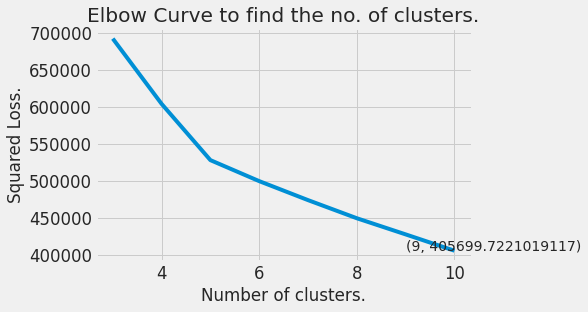

In [ ]:
squared_errors = []
for cluster in num_clus:
    kmeans = KMeans(n_clusters = cluster).fit(sent_vectors)      # Train Cluster
    squared_errors.append(kmeans.inertia_)                       # Appending the squared loss obtained in the list
optimal_clusters = np.argmin(squared_errors) + 2                 # As argmin return the index of minimum loss. 
plt.plot(num_clus, squared_errors)
plt.title("Elbow Curve to find the no. of clusters.")
plt.xlabel("Number of clusters.")
plt.ylabel("Squared Loss.")
xy = (optimal_clusters, min(squared_errors))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.show()

In [ ]:
print ("The optimal number of clusters obtained is - ", optimal_clusters)
print ("The loss for optimal cluster is - ", min(squared_errors))

The optimal number of clusters obtained is -  9
The loss for optimal cluster is -  405699.7221019117


In [ ]:
model2 = KMeans(n_clusters = optimal_clusters)
model2.fit(sent_vectors)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
word_cluster_pred=model2.predict(sent_vectors)
word_cluster_pred_2=model2.labels_
word_cluster_center=model2.cluster_centers_

In [ ]:
word_cluster_center[1:2]

array([[ 0.70006582,  0.31029143,  0.20332425, -0.03301891, -0.64254168,
        -0.39724479,  0.02451782, -0.31057777,  0.26045813, -0.25568233,
         0.06729823, -0.2677317 , -0.84726076, -0.08494981, -0.19267759,
        -0.30774071,  0.6820638 ,  0.33069962,  0.74957734,  0.52991914,
        -0.72404162,  0.03187168,  0.27112104, -0.13743661, -0.8937525 ,
         0.08339393, -0.37968206,  0.31052094, -0.56720612, -0.19551102,
        -0.22467506,  0.37035152,  0.25760038,  0.4016795 ,  0.35081147,
        -0.37430056, -0.63732379, -0.09174536,  0.04403018,  0.19669057,
        -0.42582966, -0.47999781, -0.41730633,  0.33863735,  0.30694789,
        -1.10308777, -0.30771808, -0.46927369, -0.21281516, -0.47787379,
        -0.17020244,  0.36906925, -0.1257794 , -0.31575528, -0.10371576,
         0.38253812, -0.8111264 ,  1.1909035 ,  0.61634313,  0.29386014,
        -0.39607426,  0.72224591, -0.1371635 , -0.61261786, -0.43057255,
         0.37777334, -0.50080285,  0.54996369, -0.3

In [ ]:
df= dataframe
df['AVG-W2V Clus Label'] = model2.labels_
df.groupby(['AVG-W2V Clus Label'])['moderna_cleaned'].count()

AVG-W2V Clus Label
0     9835
1    19543
2    17341
3    10853
4     5866
5     1360
6     3471
7    17487
8     4244
Name: moderna_cleaned, dtype: int64

###**KMeans for Pfizer**

In [ ]:
count_vect = CountVectorizer()                   #using bag of words
bow = count_vect.fit_transform(dataframe['pfizer_cleaned'].values)
bow.shape

(90000, 163808)

In [ ]:
list_of_sent_train=[]
for sent in dataframe['pfizer_cleaned'].values:
    list_of_sent_train.append(sent.split())

In [ ]:
w2v_model=gensim.models.Word2Vec(list_of_sent_train,size=100, workers=4)

In [ ]:
sent_vectors = [];
for sent in list_of_sent_train: # for each review/sentence
    sent_vec_p = np.zeros(100)
    cnt_words_p =0;
    for word in sent:
      try:
            vec = w2v_model.wv[word]
            sent_vec_p += vec
            cnt_words_p += 1
      except:
            pass
    sent_vec_p /= cnt_words_p
    sent_vectors.append(sent_vec_p)
sent_vectors = np.array(sent_vectors)
sent_vectors = np.nan_to_num(sent_vectors)
sent_vectors.shape

(90000, 100)

In [ ]:
num_clus = [x for x in range(3,11)]
num_clus

[3, 4, 5, 6, 7, 8, 9, 10]

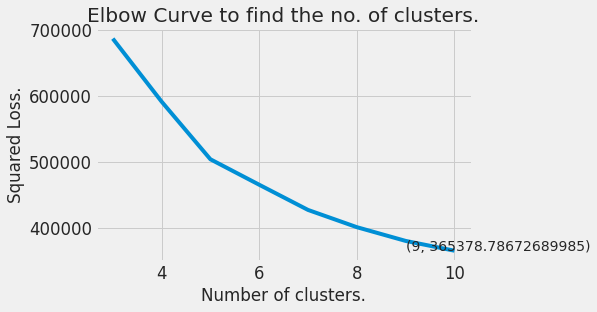

In [ ]:
squared_errors = []
for cluster in num_clus:
    kmeans = KMeans(n_clusters = cluster).fit(sent_vectors)      # Train Cluster
    squared_errors.append(kmeans.inertia_)                       # Appending the squared loss obtained in the list
optimal_clusters = np.argmin(squared_errors) + 2                 # As argmin return the index of minimum loss. 
plt.plot(num_clus, squared_errors)
plt.title("Elbow Curve to find the no. of clusters.")
plt.xlabel("Number of clusters.")
plt.ylabel("Squared Loss.")
xy = (optimal_clusters, min(squared_errors))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.show()

In [ ]:
print ("The optimal number of clusters obtained is - ", optimal_clusters)
print ("The loss for optimal cluster is - ", min(squared_errors))

The optimal number of clusters obtained is -  9
The loss for optimal cluster is -  365378.78672689985


In [ ]:
model2 = KMeans(n_clusters = optimal_clusters)
model2.fit(sent_vectors)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
word_cluster_pred=model2.predict(sent_vectors)
word_cluster_pred_2=model2.labels_
word_cluster_center=model2.cluster_centers_

In [ ]:
word_cluster_center[1:2]

array([[ 0.61817323, -0.2109972 ,  0.33071943, -0.44510402, -0.49743246,
        -0.23366459,  0.1587601 , -0.95383241,  0.2659561 , -0.30170665,
        -0.37615075, -0.53619355, -0.74542276, -0.05968271, -0.34688411,
        -0.23782891, -0.15748362,  0.4211751 ,  0.20762869, -0.31520477,
        -0.47958594,  0.63881281, -0.4176023 ,  0.06080649, -0.44721311,
         0.26799996, -0.59281343,  0.13947462, -0.63939926,  0.37212355,
        -0.08335717,  0.01994924,  0.4177216 ,  0.21882279,  0.26930073,
        -0.83026201, -0.38048404,  0.32292478, -0.03578687, -0.15225626,
        -0.35614539, -0.15770978, -0.11301736,  0.45886591,  0.31042572,
        -1.46383407, -0.26460542, -0.05476226,  0.37408106, -0.75723755,
        -0.25183795, -0.53413882,  0.24745936, -0.35142689, -0.02873892,
         0.90225574, -0.5811208 ,  0.89032878, -0.00464775, -0.10566075,
        -0.51015469,  0.1770596 , -0.08747324, -0.79331083, -0.54087332,
        -0.21311437, -0.35192036,  0.66273642, -0.6

In [ ]:
df= dataframe
df['AVG-W2V Clus Label'] = model2.labels_
df.groupby(['AVG-W2V Clus Label'])['pfizer_cleaned'].count()

AVG-W2V Clus Label
0     4438
1    17672
2    14121
3     9443
4     6449
5    14127
6    18763
7     1754
8     3233
Name: pfizer_cleaned, dtype: int64

###**LDA Modeling**

In [ ]:
import gensim.corpora as corpora
import gensim
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

def LDAModelling(vacc_name):
  datacleaned  = [d.split() for d in dataframe[vacc_name+'_cleaned']]
  id2word = corpora.Dictionary(datacleaned)
  texts = datacleaned
  corpus = [id2word.doc2bow(text) for text in texts]
  print(corpus[:1])
  #readable format of corpus (term-frequency)
  [[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]
  lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=20, random_state=100, update_every=1, chunksize=100, passes=10, alpha='auto', per_word_topics=True)
  pprint(lda_model.print_topics())
  doc_lda = lda_model[corpus]
  print(vacc_name+' Perplexity: ', lda_model.log_perplexity(corpus))  
  #Coherence Score
  coherence_model_lda = CoherenceModel(model=lda_model, texts=datacleaned, dictionary=id2word, coherence='c_v')
  coherence_lda = coherence_model_lda.get_coherence()
  print('Coherence Score for '+vacc_name+': ', coherence_lda)
  return lda_model, corpus, id2word


pyLDAvis.enable_notebook()
lda_model, corpus, id2word = LDAModelling("moderna")
lda_viz = gensimvis.prepare(lda_model, corpus, id2word)
pyLDAvis.display(lda_viz)

LDAModelling("pfizer")
lda_viz = gensimvis.prepare(lda_model, corpus, id2word)
pyLDAvis.display(lda_viz)

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


[[(0, 1), (1, 1), (2, 1), (3, 3), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1)]]


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

[(0,
  '0.245*"pfizer" + 0.045*"astrazeneca" + 0.036*"may" + 0.024*"clinic" + '
  '0.020*"man" + 0.015*"n" + 0.014*"need" + 0.011*"your" + 0.010*"du" + '
  '0.009*"ill"'),
 (1,
  '0.098*"day" + 0.035*"two" + 0.032*"receiv" + 0.029*"last" + 0.020*"if" + '
  '0.012*"in" + 0.011*"free" + 0.011*"all" + 0.009*"center" + 0.009*"sure"'),
 (2,
  '0.073*"arm" + 0.050*"sore" + 0.049*"no" + 0.039*"yesterday" + 0.031*"good" '
  '+ 0.024*"thank" + 0.020*"we" + 0.015*"right" + 0.014*"sat" + 0.013*"done"'),
 (3,
  '0.043*"one" + 0.039*"my" + 0.031*"hour" + 0.028*"it" + 0.019*"that" + '
  '0.018*"fever" + 0.016*"felt" + 0.015*"next" + 0.015*"headach" + '
  '0.015*"just"'),
 (4,
  '0.113*"que" + 0.049*"o" + 0.015*"ma" + 0.014*"vida" + 0.011*"uma" + '
  '0.011*"what" + 0.010*"select" + 0.010*"hear" + 0.009*"pm" + 0.008*"ser"'),
 (5,
  '0.026*"di" + 0.018*"p" + 0.017*"per" + 0.016*"third" + 0.016*"reaction" + '
  '0.015*"me" + 0.015*"inject" + 0.013*"dat" + 0.012*"non" + 0.011*"part"'),
 (6,
  '0.058*"un

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

moderna Perplexity:  -11.941927909023965
Coherence Score for moderna:  0.42290930999885246
[[(0, 1), (1, 1), (2, 1), (3, 3), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1)]]


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

###**LSA Modeling**

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
LSA Model for Moderna:
[(0, '0.835*"moderna" + 0.219*"vaccin" + 0.202*"pfizer" + 0.193*"de" + 0.165*"got" + 0.154*"shot" + 0.142*"la" + 0.115*"second" + 0.108*"dose" + 0.097*"get"'), (1, '0.688*"de" + 0.512*"la" + 0.202*"que" + -0.157*"moderna" + 0.152*"en" + 0.136*"el" + -0.134*"got" + -0.125*"shot" + -0.123*"vaccin" + 0.111*"e"'), (2, '0.810*"vaccin" + 0.298*"pfizer" + -0.255*"shot" + -0.198*"got" + -0.164*"moderna" + 0.163*"covid" + -0.153*"second" + -0.076*"nd" + -0.074*"day" + 0.067*"le"'), (3, '-0.619*"pfizer" + 0.418*"vaccin" + 0.323*"got" + 0.283*"shot" + -0.243*"moderna" + 0.212*"second" + 0.178*"de" + 0.149*"first" + 0.139*"dose" + 0.097*"covid"'), (4, '0.603*"pfizer" + 0.391*"got" + 0.348*"shot" + -0.344*"moderna" + 0.294*"de" + -0.166*"que" + -0.141*"la" + -0.130*"e" + 0.121*"second" + 0.101*"get"'), (5, '-0.630*"la" + 0.572*"de" + -0.229*"que" + -0.226*"shot" + -0

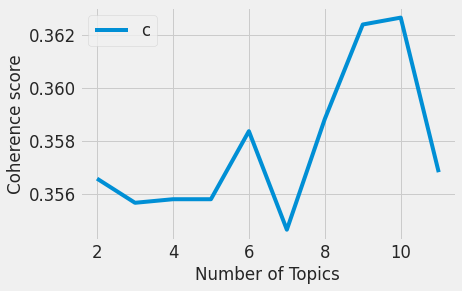




LSA Model for Pfizer:
[(0, '0.807*"pfizer" + 0.333*"de" + 0.229*"la" + 0.200*"vaccin" + 0.121*"que" + 0.120*"got" + 0.114*"dose" + 0.098*"shot" + 0.094*"moderna" + 0.084*"vacuna"'), (1, '0.637*"de" + 0.447*"la" + -0.348*"pfizer" + 0.201*"que" + -0.194*"vaccin" + 0.149*"vacuna" + -0.145*"got" + 0.121*"en" + -0.117*"shot" + 0.113*"el"'), (2, '0.881*"vaccin" + -0.249*"pfizer" + 0.200*"de" + 0.181*"covid" + -0.130*"shot" + -0.090*"got" + -0.086*"la" + 0.082*"le" + -0.075*"que" + -0.060*"second"'), (3, '0.612*"de" + -0.568*"la" + -0.312*"que" + -0.204*"vaccin" + 0.189*"dose" + 0.138*"got" + -0.096*"vacuna" + 0.095*"shot" + -0.092*"e" + -0.088*"con"'), (4, '-0.538*"got" + -0.392*"shot" + -0.346*"la" + 0.323*"pfizer" + -0.267*"second" + -0.237*"dose" + -0.226*"first" + 0.177*"moderna" + -0.103*"today" + -0.101*"nd"'), (5, '0.753*"que" + -0.353*"la" + 0.344*"dose" + 0.167*"e" + 0.138*"da" + 0.120*"lo" + 0.119*"le" + -0.118*"shot" + -0.116*"moderna" + 0.109*"got"'), (6, '0.693*"dose" + -0.56

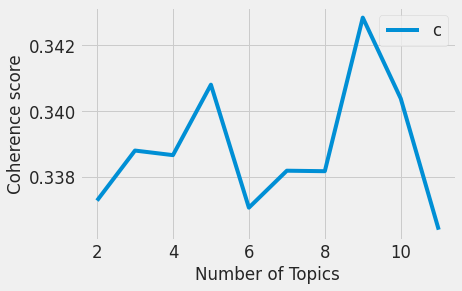

In [ ]:
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
import nltk 
nltk.download('stopwords')

def preprocess_data(doc_set): 
    # initialize regex tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    # create English stop words list
    en_stop = set(stopwords.words('english'))
    # Create p_stemmer of class PorterStemmer
    p_stemmer = PorterStemmer()
    # list for tokenized documents in loop
    texts = []
    # loop through document list
    for i in doc_set:
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        # add tokens to list
        texts.append(stemmed_tokens)
    return texts

def plot_graph( doc_clean,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                            stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

def prepare_corpus(doc_clean):
    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LDA model
    return dictionary,doc_term_matrix

def LSA_model(vacc_name, doc_clean,number_of_topics,words): 
  dictionary,doc_term_matrix=prepare_corpus(doc_clean)
  lsamodel = LsiModel(doc_term_matrix, num_topics=20, id2word = dictionary)  # train model
  print(lsamodel.print_topics(num_topics=20, num_words=10))
  return lsamodel

number_of_topics=20
words=10
clean_text=preprocess_data(dataframe['moderna_cleaned'])
print("LSA Model for Moderna:")
model = LSA_model("moderna", clean_text,number_of_topics,words)
start,stop,step=2,12,1
plot_graph(clean_text,start,stop,step)

print("\n\n\nLSA Model for Pfizer:")
clean_text=preprocess_data(dataframe['pfizer_cleaned'])
model = LSA_model("pfizer", clean_text,number_of_topics,words)
start,stop,step=2,12,1
plot_graph(clean_text,start,stop,step)